## Netflix Data- Exploratory Data Analysis (EDA)

In [274]:
# importing libraires
%matplotlib inline                 

import pandas as pd                # Implemennts milti-dimensional array and matrices
import numpy as np                 # For data manipulation and analysis
import matplotlib.pyplot as plt    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns              # Provides a high level interface for drawing attractive and informative statistical graphics

In [275]:
# loding data
netflix = pd.read_csv("netflix_titles.csv")

In [276]:
# shape of dataset
netflix.shape

(6234, 12)

In [277]:
# understaing dataset features and its dtypes
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


### The dataset is all about titles of shows which are streamed on Netflix.
- show_id: int64 : Unique id of a show
- type: object : Whether it is a Movie or a TV show
- title: object : Title of that show
- director: object : Name of director of that Movie/Show
- cast: object : Cast of the film
- country: object : Origin country of the Movie/Show
- date_added: object : Date on which it is listed on Netflix
- release_year: int64 : Release year of the Movie/Show
- rating: object : Rating or Class of that Movie/Show
- duration: object : Total duration of a Movie/Show
- listed_in: object : Genre of that show like, Comedy, Romantic, Sports, etc.
- description: object : Description of the Movie/Show

In [278]:
# glance through some of the records of the dataset
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [279]:
# looking for null values
netflix.isnull().sum() 

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

### What percent of Movies and TV Shows are there in dataset?

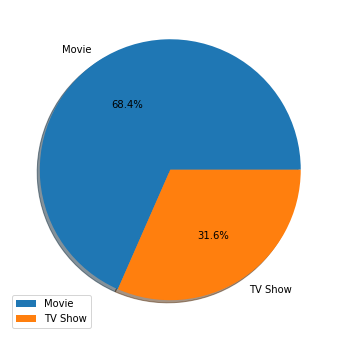

In [280]:
types = netflix['type'].value_counts()  # series data
plt.figure(figsize=(10,6))
plt.pie(np.array([types['Movie'],types['TV Show']]), labels=['Movie','TV Show'], autopct='%1.1f%%', shadow=True)
plt.legend()
plt.show()

- **Obervations:**
- The number of movies listed on Netflix is greater than TV Shows listing on Netflix.
- But, over the period, people are loving TV Shows too, and popularity of shows is increasing.
- We'll analyse the trend of listing of TV Shows on Netflix vs Movies on Netflix over the years.

### In which year, maximum number of TV Show listed on Netflix?

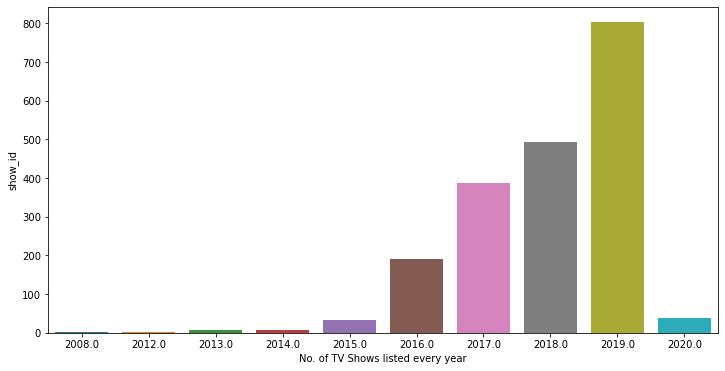

In [282]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
tv_shows = netflix[netflix['type']=='TV Show']
tv_shows_by_year = tv_shows.groupby(pd.DatetimeIndex(tv_shows['date_added']).year)['show_id'].count()

plt.figure(figsize=(12,6))
sns.barplot(x=tv_shows_by_year.index, y=tv_shows_by_year)
plt.xlabel("Years")
plt.xlabel("No. of TV Shows listed every year")
plt.show()

- **Obervations:**
- The above bar chart says that popularity of listing of TV Shows on Netflix in increased from year 2015.
- As per the data available with us, is not of complete 2020 year.
- The visualization shows that, the year 2019 has the maximum count of listing of TV Shows of Netflix.

### In which year, maximum number of Movie listed on Netflix?

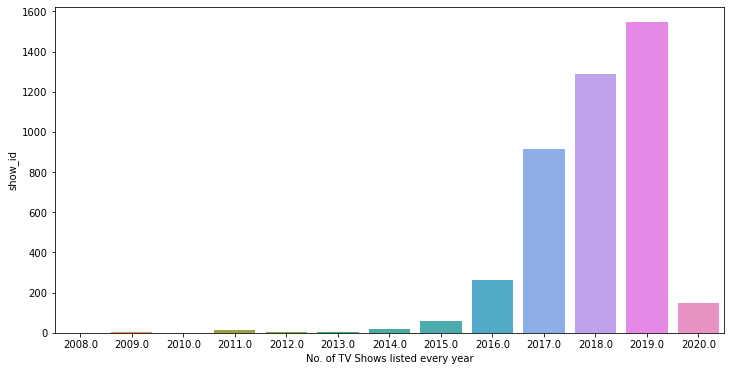

In [283]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
all_movies = netflix[netflix['type']=='Movie']
all_movies_by_year = all_movies.groupby(pd.DatetimeIndex(all_movies['date_added']).year)['show_id'].count()

plt.figure(figsize=(12,6))
sns.barplot(x=all_movies_by_year.index, y=all_movies_by_year)
plt.xlabel("Years")
plt.xlabel("No. of TV Shows listed every year")
plt.show()

- **Obervations:**
- The above bar chart says that, listing movies is increased from year 2015.
- and it kept on increasing as years are coming.
- As the data of 2020 year is not fully available, 2019 has the maximum listing of movies on Netflix

#### Trend of listing of TV Shows on Netflix vs Movies on Netflix over the years
- As we analysed, the trend of listing of both type of catgories which are there on Neflix. We can colnclude that, Movies as well as TV Shows are increasing as the years are passing. In numerical terms, Movies are still greater in count than TV Shows. But, trend of the popularity of TV Shows is almost same as Movies listed on Netflix.

### What is the average duration of all movies?

In [284]:
duration = [i.split()[0] for i in netflix['duration']]
netflix['duration'] = duration
netflix['duration'] = netflix['duration'].astype(int)
average_duration = netflix[netflix['type'] == 'Movie'].duration.mean()
print("Average Duration of All Movies on Netflix is :%.2f minutes"%(average_duration))

Average Duration of All Movies on Netflix is :99.10 minutes


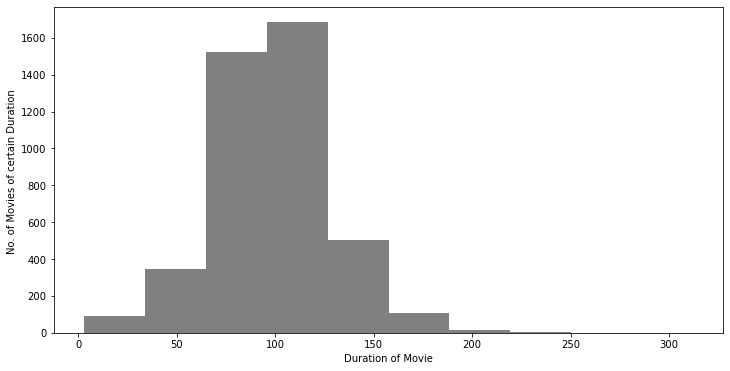

In [285]:
plt.figure(figsize=(12,6))
dist_duration = netflix[netflix.type == 'Movie']['duration'] 
#sns.distplot(dist_duration, kde=False, color='seagreen', kde_kws={'shade':True})
plt.hist(dist_duration, color='grey')
plt.xlabel("Duration of Movie")
plt.ylabel("No. of Movies of certain Duration ")
plt.show()

- **Obervations:**
- Most of the duration of movie is between 75 minutes to 125 minutes.
- The average of duration of movies is 99.10 minutes.

### Top 3 countries releasing maximum movies on Netflix

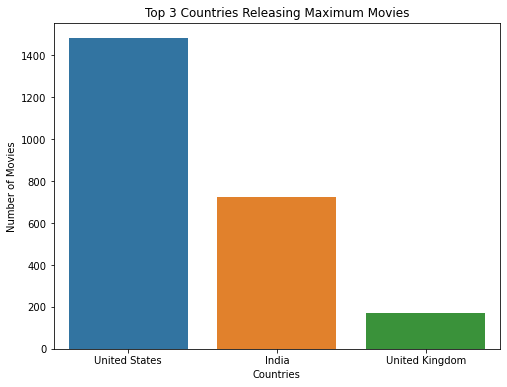

In [286]:
movie =netflix[netflix['type']=='Movie']
country_wise_movie = movie['country'].value_counts().sort_values(ascending=False).head(3)
plt.figure(figsize=(8,6))
sns.barplot(x=country_wise_movie.index,y=country_wise_movie)
plt.title("Top 3 Countries Releasing Maximum Movies")
plt.xlabel("Countries")
plt.ylabel("Number of Movies")
plt.show()

- **Observations:**
- The top 3 contributing countries on Netflix are United States, India and United Kingdom.
- United State being on top of this notch and releasing extremely more movies than other two. On the other hand, United Kingdom has on the rank 3 but its contribution is less as compared to first.
- India has contributed in somewhat median number of movies than other two contributors.

### Show the count of movies originated from India since 2015

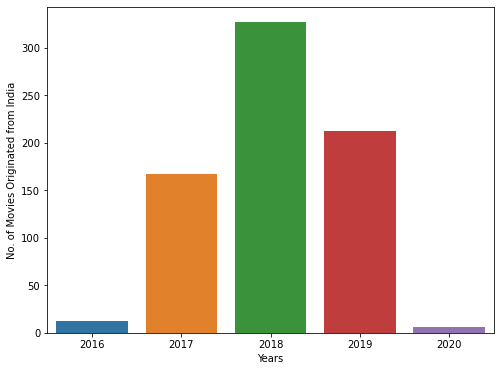

In [287]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
movies_since_2015 = netflix[(netflix['type'] == 'Movie') & (netflix['country']=='India') 
                            & (netflix['date_added'] >= '2015-01-01')]
movies_by_year = movies_since_2015.groupby(pd.DatetimeIndex(movies_since_2015['date_added']).year)['show_id'].count()
data = [movies_since_2015,movies_by_year]
headers = ['movies_since_2015','movies_by_year']
since_2015 = pd.concat(data, axis=1, keys=headers)

plt.figure(figsize=(8,6))
sns.barplot(x=movies_by_year.index, y=movies_by_year)
plt.xlabel("Years")
plt.ylabel("No. of Movies Originated from India")
plt.show()

- **Observations:**
- From year 2016, Movies originated from India are listed on Netflix. In the starting year, the count of movies were too less.
- In recent years, the count of movies originated from India is increased.

### 3 Most Popular Directors of TV Show and Movies together

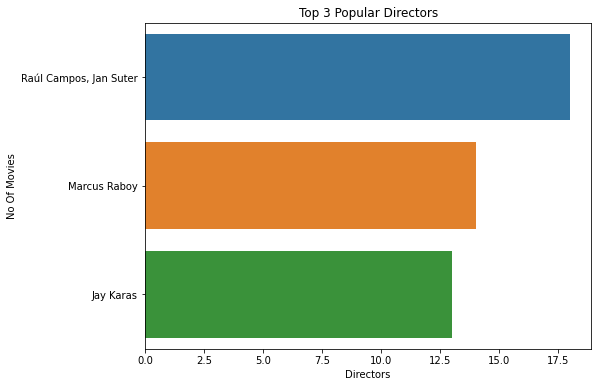

In [288]:
director=netflix['director'].value_counts().sort_values(ascending=False).head(3)
plt.figure(figsize=(8,6))
sns.barplot(y=director.index,x=director.values)
plt.title("Top 3 Popular Directors")
plt.xlabel("Directors")
plt.ylabel("No Of Movies")
plt.show()

- **Obeservations:**
- The 3 Most Popular Directors are Raúl Campos, Jan Suter as Duo, Marcus Raboy and Jay Karas.
- The competition is tough as three of them have directed 18,14,13 movies respectively.

### Top 5 Genres of Movies

In [289]:
netflix[netflix["type"]=="Movie"]["listed_in"].value_counts().head()


Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Name: listed_in, dtype: int64

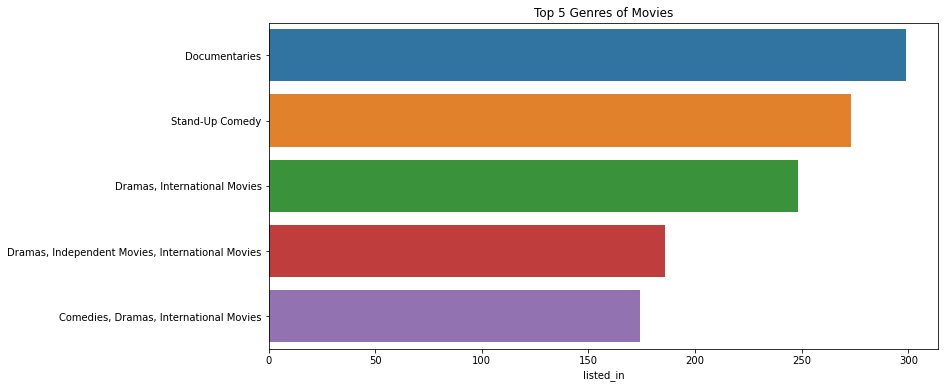

In [290]:
plt.figure(figsize=(12,6))
genre = netflix[netflix["type"]=="Movie"]["listed_in"].value_counts().head()
sns.barplot(x=genre, y=genre.index)
plt.title("Top 5 Genres of Movies")
plt.show()

- **Observations:**
- The top 5 genre of Movies unfold many facts about the customer behaviour of Netflix.
- The top genre in 'Documentaries', most of the people are watching this to learn and aquire new skills from these type of movies. Where as on the other hand, the Second Top genre is 'Stand-Up Comedy'. The estimation can say that, young crowd attracted towards these type genre. Indirectly,these genres may represent the huge age group difference between watchers of both genres.

### Top 5 Genres of TV Shows

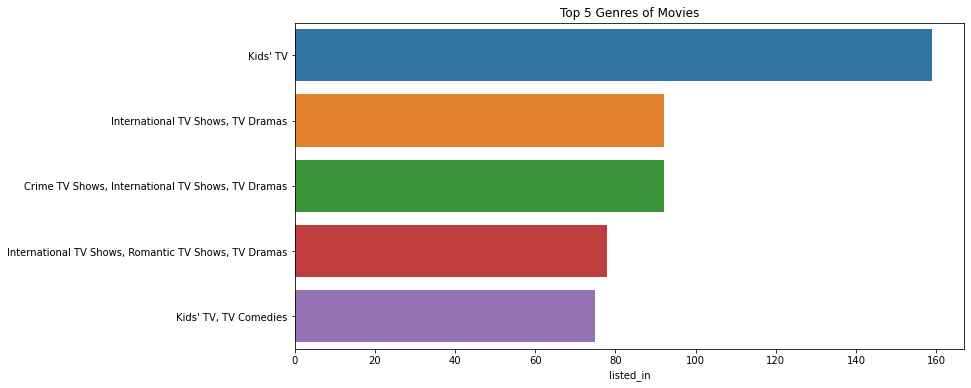

In [291]:
plt.figure(figsize=(12,6))
genre = netflix[netflix["type"]=="TV Show"]["listed_in"].value_counts().head()
sns.barplot(x=genre, y=genre.index)
plt.title("Top 5 Genres of Movies")
plt.show()

- **Observations:**
- This insight really shocked me when saw the top genre of TV Shows. Kids TV is at the top-notch and the count is too high than second top genre of TV Show.
- Another genres are struggling and the count of tme is almost near or equal. So as we have seen, people are taking interest in TV Shows as the years are passing.
- One more point to note is, people are also watching Crime TV Shows in more numbers than Romantic TV Shows. These clearly says that, that genres like, thriller, adventure and crime must fascinating people and this can be the potential market for filmmakers.

### Over the time, Netflix has listed shorter movies in duration or longer? Estimate the average!

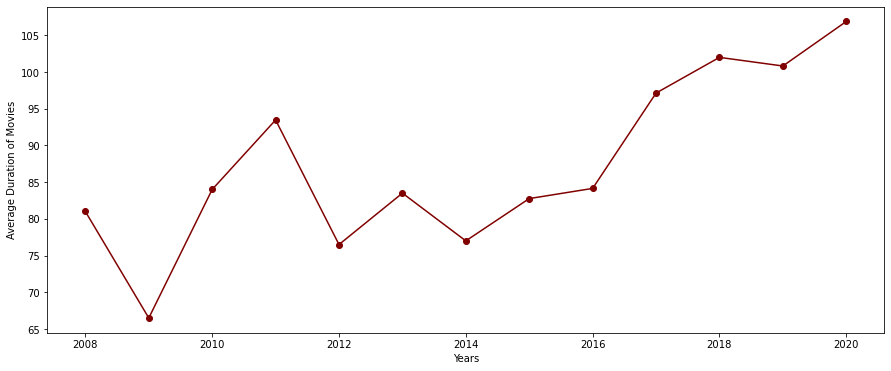

In [292]:
netflix[netflix.type == 'Movie'].groupby(netflix['date_added'].dt.year).mean().duration.plot(kind='line',figsize=(15,6), color='maroon', marker='o')
plt.xlabel("Years")
plt.ylabel("Average Duration of Movies")
plt.show()

- **Observations:**
- The graph is quite interesting that is shows relationship between interest of people in watching longer films and flim-makers creating that. Over the decade, (i.e. 2010-2020) the average duration of movies has been extremrly increased without a big drop(i.e. not less than 75 minutes).
- Th transformation of of increasing movie duration is so fascinating that it shows the increasing interest of people in watching movies.

### Message:
- The dataset is so detailed and insightful. As we dig deeper, we found something new and new. Try to scratch out some questions and try to conclude that. Its really a fun finding insights from a data from no where.